In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import callbacks
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
df=pd.read_excel('/content/ML Live Flight Fare Resourses16963295320 (1).xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
del df['Route']

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df['j_date']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['j_mon']=pd.to_datetime(df['Date_of_Journey']).dt.month


df['a_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['a_min']=pd.to_datetime(df['Arrival_Time']).dt.minute


df['d_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['d_min']=pd.to_datetime(df['Dep_Time']).dt.minute

df['month_name']=pd.to_datetime(df['Date_of_Journey']).dt.month_name()
df['year']=pd.to_datetime(df['Date_of_Journey']).dt.year

In [ ]:
lis=df['Duration']
new_lis=[]
for i in lis:
    if 'm'not in i:
        i=i+'0m'
    elif'h'not in i:
        i='0h'+i
    new_lis.append(i)

In [ ]:
df['Duration'] = new_lis

In [ ]:
df['du_hu']=df['Duration'].str.split('h').str[0].astype(int)

In [ ]:
df['du_min']=df['Duration'].str.split('h').str[1].replace('m','',regex=True).astype(int)

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,month_name,year,du_hu,du_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,March,2019,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,May,2019,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h0m,2 stops,No info,13882,9,6,4,25,9,25,June,2019,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,May,2019,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,March,2019,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,22,25,19,55,April,2019,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,23,20,20,45,April,2019,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h0m,non-stop,No info,7229,27,4,11,20,8,20,April,2019,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,14,10,11,30,March,2019,2,40


In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

<Axes: xlabel='Airline'>

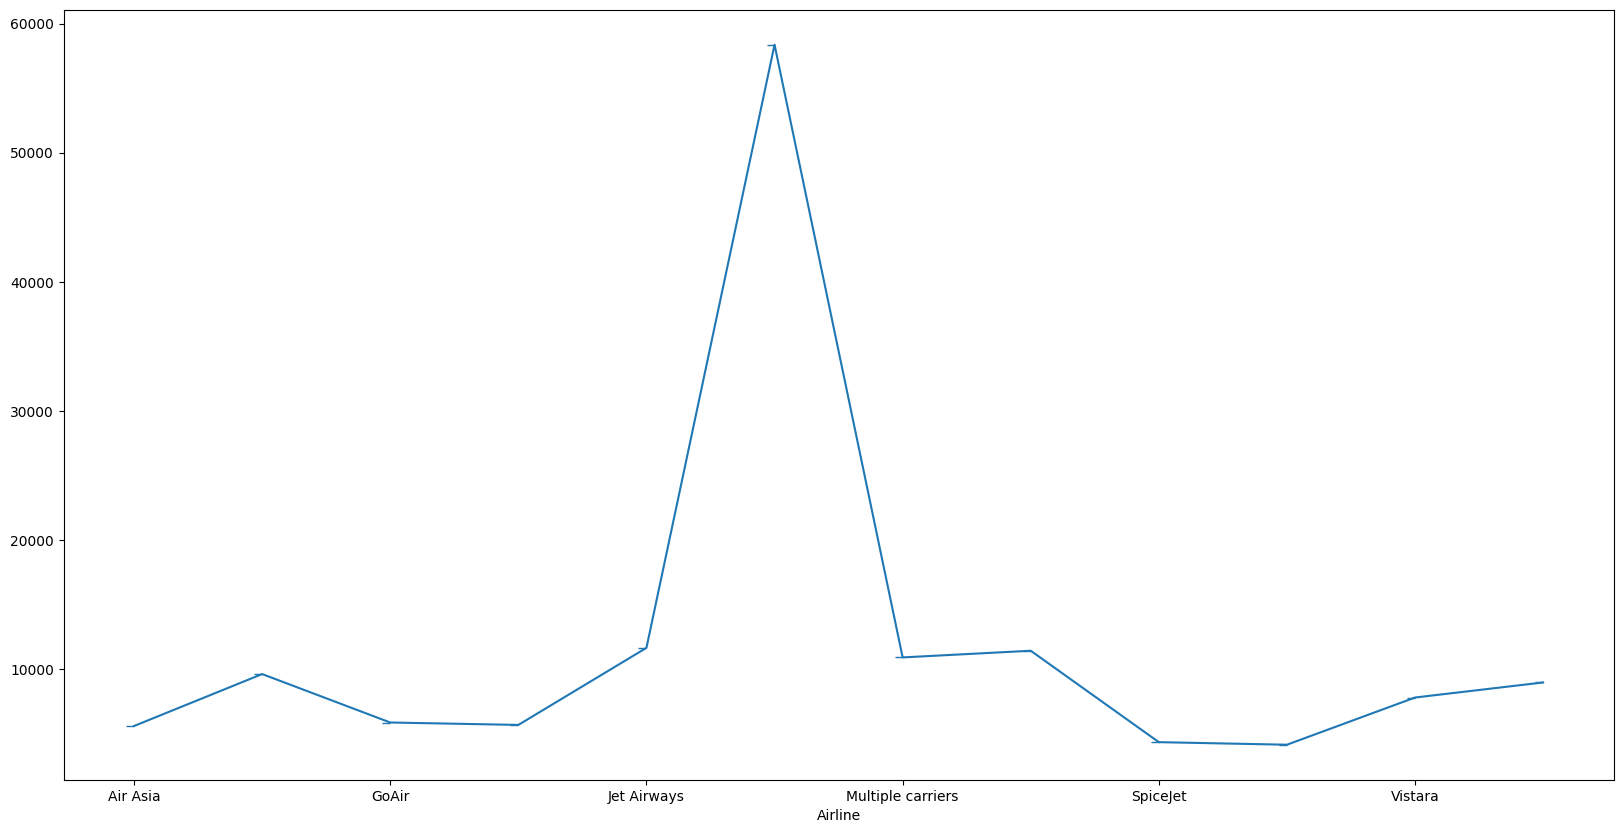

In [ ]:
df.groupby('Airline')['Price'].mean().plot(kind='line',marker=0,figsize=(20,10))

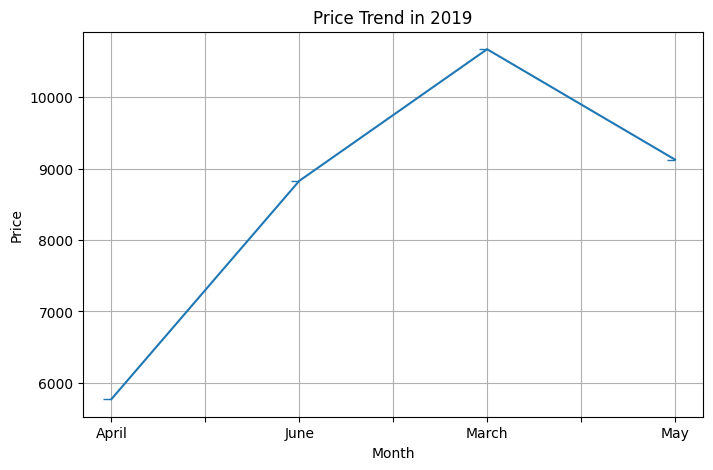

In [ ]:
import matplotlib.pyplot as plt
df_2019 =  df[df['year'] == 2019]


#plt.plot(df_2019['month_name'], data['Price'], marker='o')
df.groupby(df_2019['month_name'])['Price'].mean().plot(kind='line',marker=0,figsize=(8,5))
plt.title('Price Trend in 2019')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

<Figure size 2000x1000 with 0 Axes>

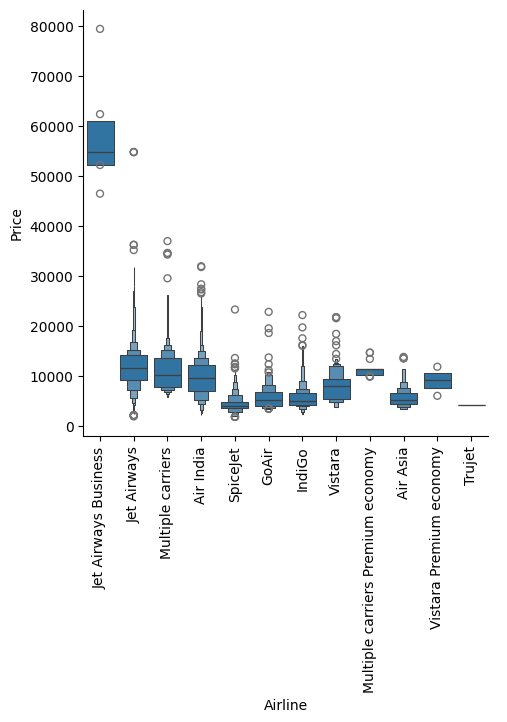

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.xticks(rotation=90)

In [ ]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','month_name','year'],axis=1,inplace=True)

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,14,10,11,30,2,40


In [ ]:
df.to_csv("cleaned_flight_data.csv", index=False)

In [ ]:
df=pd.read_csv('/content/cleaned_flight_data.csv')
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,22,25,19,55,2,30
10678,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,23,20,20,45,2,35
10679,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,11,20,8,20,3,0
10680,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,14,10,11,30,2,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

df['Airline'] = enc.fit_transform(df['Airline'])
joblib.dump(enc, "Airline_encoder.pkl")

df['Source'] = enc.fit_transform(df['Source'])
joblib.dump(enc, "Source_encoder.pkl")

df['Destination'] = enc.fit_transform(df['Destination'])
joblib.dump(enc, "Destination_encoder.pkl")

df['Total_Stops'] = enc.fit_transform(df['Total_Stops'])
joblib.dump(enc, "Total_Stops_encoder.pkl")

df['Additional_Info'] = enc.fit_transform(df['Additional_Info'])
joblib.dump(enc, "Additional_Info_encoder.pkl")

['Additional_Info_encoder.pkl']

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,3,0,5,4,8,3897,24,3,1,10,22,20,2,50
1,1,3,0,1,8,7662,1,5,13,15,5,50,7,25
2,4,2,1,1,8,13882,9,6,4,25,9,25,19,0
3,3,3,0,0,8,6218,12,5,23,30,18,5,5,25
4,3,0,5,0,8,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,4,8,4107,9,4,22,25,19,55,2,30
10678,1,3,0,4,8,4145,27,4,23,20,20,45,2,35
10679,4,0,2,4,8,7229,27,4,11,20,8,20,3,0
10680,10,0,5,4,8,12648,1,3,14,10,11,30,2,40


In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import  StandardScaler
import pandas as pd

In [ ]:
import joblib
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Save scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,0.870406,0.045875,-0.298758,-0.804100,0.493087,1.579784,0.255066,0.826796,-0.588051,-0.774838,0.286492,-0.025427,0.981115
1,0.018396,0.045875,-0.298758,-0.804100,-1.997611,-0.543018,0.255066,-0.191673,0.625325,-0.253774,0.286492,1.743881,-1.370781
2,1.722415,0.045875,-0.298758,-0.804100,0.493087,1.225984,-0.604034,1.263283,-1.194738,0.440979,1.086340,-0.497242,-0.488820
3,0.870406,0.045875,-0.298758,-0.804100,0.493087,0.872183,-1.463134,-1.792123,0.625325,-0.080086,1.352957,0.210481,0.981115
4,-1.259618,0.045875,-0.298758,-0.249984,0.493087,1.225984,1.114165,0.826796,-0.588051,0.788355,-0.513357,1.861835,-1.664768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8540,0.018396,0.045875,-0.298758,-0.804100,0.493087,1.579784,-1.463134,-1.355637,0.018637,-0.601150,-1.313206,1.036158,-0.194833
8541,0.018396,0.894369,-0.973947,-0.804100,-1.997611,-0.543018,0.255066,0.972292,1.232013,0.267291,-1.046590,-0.497242,0.687128
8542,0.870406,0.045875,-0.298758,-0.804100,0.493087,0.164582,0.255066,-1.792123,0.321981,-0.080086,1.352957,0.210481,0.687128
8543,-0.407609,-1.651112,2.401996,1.412363,0.493087,-1.250619,-1.463134,-1.501132,0.018637,-2.164343,0.819724,-0.969057,0.981115


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
print('Training Score:',model.score(X_train,y_train))
print('Testing Score:',model.score(X_test,y_test))

y_pred_1=model.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_1))

print('r2 Score:',r2_score(y_test,y_pred_1))

Training Score: 0.979663900635976
Testing Score: 0.8631760616841325
mean_squared_error: 2950205.464460372
r2 Score: 0.8631760616841325


In [ ]:
le=LinearRegression()
le.fit(X_train,y_train)

print('Training Score:',le.score(X_train,y_train))
print('Testing Score:',le.score(X_test,y_test))

y_pred=le.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred))

print('r2 Score:',r2_score(y_test,y_pred) )

Training Score: 0.4170450033985721
Testing Score: 0.4350685870002422
mean_squared_error: 12181082.946389081
r2 Score: 0.4350685870002422


In [ ]:
tree=DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)
print('Training Score:',tree.score(X_train,y_train))
print('Testing Score:',tree.score(X_test,y_test))

y_predP_tree=tree.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_predP_tree))

print('r2 Score:',r2_score(y_test,y_predP_tree) )

Training Score: 0.8617816709716141
Testing Score: 0.7607677603879746
mean_squared_error: 5158339.025069862
r2 Score: 0.7607677603879746


In [ ]:
svm=SVR()
svm.fit(X_train,y_train)

print('Training Score:',svm.score(X_train,y_train))
print('Testing Score:',svm.score(X_test,y_test))

y_pred_svm=tree.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_svm))

print('r2 Score:',r2_score(y_test,y_pred_svm) )

Training Score: 0.028700149618795634
Testing Score: 0.026016508278832395
mean_squared_error: 5158339.025069862
r2 Score: 0.7607677603879746


In [ ]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

print('Training Score:',knn.score(X_train,y_train))
print('Testing Score:',knn.score(X_test,y_test))

y_pred_knn=tree.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_knn))

print('r2 Score:',r2_score(y_test,y_pred_knn) )

Training Score: 0.837146109677024
Testing Score: 0.7900780663879952
mean_squared_error: 5158339.025069862
r2 Score: 0.7607677603879746


In [ ]:
naive=GaussianNB()
naive.fit(X_train,y_train)

print('Training Score:',naive.score(X_train,y_train))
print('Testing Score:',naive.score(X_test,y_test))

y_pred_naive=tree.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_naive))

print('r2 Score:',r2_score(y_test,y_pred_naive) )

Training Score: 0.5404330017554125
Testing Score: 0.34300421151146465
mean_squared_error: 5158339.025069862
r2 Score: 0.7607677603879746


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print('Training Score:',gbr.score(X_train,y_train))
print('Testing Score:',gbr.score(X_test,y_test))

y_pred_gbr=gbr.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_gbr))

print('r2 Score:',r2_score(y_test,y_pred_gbr) )

Training Score: 0.8243044676363164
Testing Score: 0.8388486559043111
mean_squared_error: 3474754.3581056204
r2 Score: 0.8388486559043111


In [ ]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
print('Training Score:',ada.score(X_train,y_train))
print('Testing Score:',ada.score(X_test,y_test))

y_pred_ada=ada.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_ada))

print('r2 Score:',r2_score(y_test,y_pred_ada) )

Training Score: 0.4539378716150799
Testing Score: 0.47890896673782213
mean_squared_error: 11235794.209214741
r2 Score: 0.47890896673782213


In [ ]:
bag=BaggingRegressor( oob_score=True)
bag.fit(X_train,y_train)
print('Training Score:',bag.score(X_train,y_train))
print('Testing Score:',bag.score(X_test,y_test))

y_pred_bag=bag.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_bag))

print('r2 Score:',r2_score(y_test,y_pred_bag) )


Training Score: 0.9725158299160889
Testing Score: 0.8391046004711153
mean_squared_error: 3469235.666940325
r2 Score: 0.8391046004711153


In [ ]:
etre=ExtraTreesRegressor()
etre.fit(X_train,y_train)
print('Training Score:',etre.score(X_train,y_train))
print('Testing Score:',etre.score(X_test,y_test))

y_pred_etre=etre.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_etre))

print('r2 Score:',r2_score(y_test,y_pred_etre) )

Training Score: 0.9955077592821276
Testing Score: 0.9145875024134635
mean_squared_error: 1841669.0837482307
r2 Score: 0.9145875024134635


In [ ]:
model=RandomForestRegressor()
vo=VotingRegressor(estimators=[('rf', model), ('gbr', gbr), ('etre', etre)])
vo.fit(X_train,y_train)
print('Training Score:',vo.score(X_train,y_train))
print('Testing Score:',vo.score(X_test,y_test))

y_pred_vo=vo.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test,y_pred_vo))

print('r2 Score:',r2_score(y_test,y_pred_vo) )

Training Score: 0.9676412023948454
Testing Score: 0.9071152637151426
mean_squared_error: 2002785.9154290087
r2 Score: 0.9071152637151426


In [ ]:
print('r2 Score RandomForest:',r2_score(y_test,y_pred_1))# RandomForest
print('r2 Score linear:',r2_score(y_test,y_pred) )# linear
print('r2 Score Decision tree:',r2_score(y_test,y_predP_tree))#tree
print('r2 Score svm:',r2_score(y_test,y_pred_svm) )#svm
print('r2 Score knn:',r2_score(y_test,y_pred_knn) )#knn
print('r2 Score GradientBoosting :',r2_score(y_test,y_pred_bag) )# GradientBoostingRegressor
print('r2 Score ExtraTrees :',r2_score(y_test,y_pred_etre) )# ExtraTreesRegressor
print('r2 Score VotingRegressor:',r2_score(y_test,y_pred_vo) )# VotingRegressor
print('r2 Score AdaBoost :',r2_score(y_test,y_pred_ada) )# AdaBoostRegressor
print('r2 Score GradientBoosting:',r2_score(y_test,y_pred_gbr) )# GradientBoostingRegressor

r2 Score RandomForest: 0.8631760616841325
r2 Score linear: 0.4350685870002422
r2 Score Decision tree: 0.7607677603879746
r2 Score svm: 0.7607677603879746
r2 Score knn: 0.7607677603879746
r2 Score GradientBoosting : 0.8391046004711153
r2 Score ExtraTrees : 0.9145875024134635
r2 Score VotingRegressor: 0.9071152637151426
r2 Score AdaBoost : 0.47890896673782213
r2 Score GradientBoosting: 0.8388486559043111


In [ ]:
X_train.shape

(8545, 13)

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=13)),
model.add(BatchNormalization()),
model.add(Dropout(0.3)),

model.add(Dense(512, activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.3)),

model.add(Dense(256, activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),

model.add(Dense(128, activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.3)),

model.add(Dense(64, activation='relu')),
model.add(BatchNormalization()),

model.add(Dense(32, activation='relu')),
model.add(Dense(1, activation='linear'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='mse',
              metrics=['r2_score'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
# Train
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=300,
                    batch_size=512,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

# Predictions
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 104473960.0000 - r2_score: -3.7532 - val_loss: 101582656.0000 - val_r2_score: -4.4379 - learning_rate: 0.0050
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 104397520.0000 - r2_score: -3.6262 - val_loss: 100491856.0000 - val_r2_score: -4.3795 - learning_rate: 0.0050
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 104477024.0000 - r2_score: -3.5893 - val_loss: 98811920.0000 - val_r2_score: -4.2896 - learning_rate: 0.0050
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 105035472.0000 - r2_score: -3.4982 - val_loss: 96787664.0000 - val_r2_score: -4.1812 - learning_rate: 0.0050
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 97994096.0000 - r2_score: -3.5956 - val_loss: 93398352.0000 - val_r2_score: -3.9998 - learning_rate: 0.0050
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 95949792.0000 - r2_score: -3.3948 - val_loss: 87358528.0000 - val_r2_score: -3.6765 - learning

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)


print("📊 Performance Metrics")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
📊 Performance Metrics
R² Score: 0.8664
MAE: 869.81
RMSE: 2880920.25


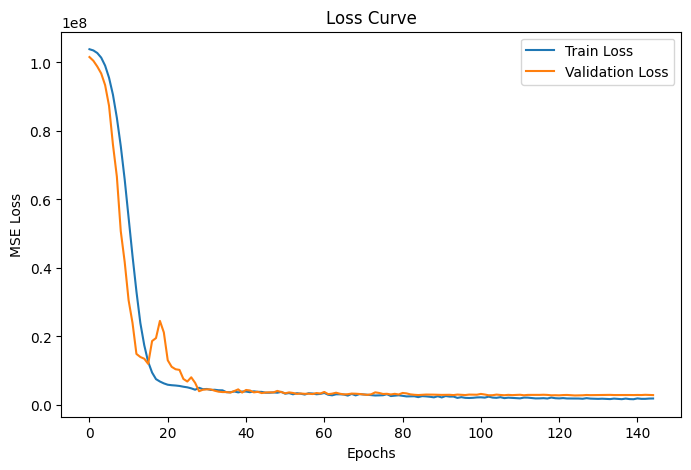

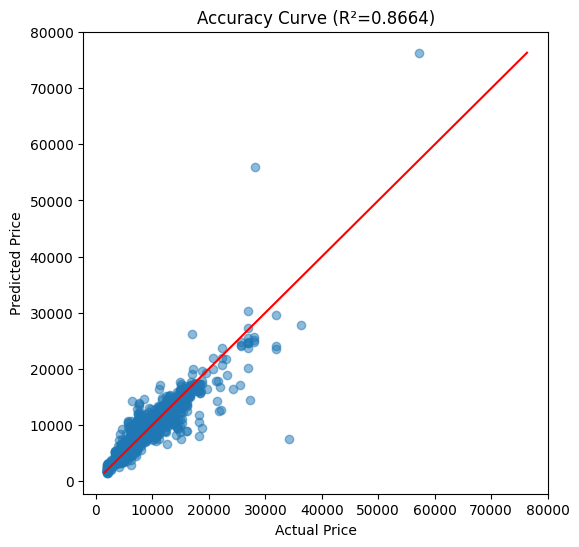

In [ ]:
# Loss Curve
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# Accuracy (Actual vs Predicted)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Accuracy Curve (R²={r2:.4f})")
plt.show()

In [ ]:
model.save("flight_price_ann.h5")

In [ ]:

airline_enc = joblib.load("Airline_encoder.pkl")
source_enc = joblib.load("Source_encoder.pkl")
dest_enc = joblib.load("Destination_encoder.pkl")
stops_enc = joblib.load("Total_Stops_encoder.pkl")
info_enc = joblib.load("Additional_Info_encoder.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,3,0,5,4,8,3897,24,3,1,10,22,20,2,50
1,1,3,0,1,8,7662,1,5,13,15,5,50,7,25


In [ ]:
Airline	Source	Destination	Total_Stops	Additional_Info	Price	j_date	j_mon	a_hr	a_min	d_hr	d_min	du_hu	du_min
0	IndiGo	Banglore	New Delhi	non-stop	No info	3897	24	3	1	10	22	20	2	50
1	Air India	Kolkata	Banglore	2 stops	No info	7662	1	5	13	15	5	50	7	25
2	Jet Airways	Delhi	Cochin	2 stops	No info	13882	9	6	4	25	9	25	19	0
3	IndiGo	Kolkata	Banglore	1 stop	No info	6218	12	5	23	30	18	5	5	25
4	IndiGo	Banglore	New Delhi	1 stop	No info	13302	1	3	21	35	16	50	4	45

In [ ]:
new_data = {
    "Airline": airline_enc.transform(["IndiGo"])[0],
    "Source": source_enc.transform(["Banglore"])[0],
    "Destination": dest_enc.transform(["New Delhi"])[0],
    "Total_Stops": stops_enc.transform(["1 stop"])[0],
    "Additional_Info": info_enc.transform(["No info"])[0],
    "j_date": 1,
    "j_mon": 3,
    "a_hr": 21,
    "a_min": 35,
    "d_hr": 16,
    "d_min": 50,
    "du_hu": 4,
    "du_min": 45
}

# Convert to dataframe
new_df = pd.DataFrame([new_data])

In [ ]:
new_scaled = scaler.transform(new_df)

In [ ]:
predicted_price = model.predict(new_scaled)[0][0]
print(f"💰 Predicted Flight Price: {predicted_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
💰 Predicted Flight Price: 6820.31
